# Classificação de Imagens e Máquinas de Vetores de Suporte Clássica e Quântica

Os arquivos (artigo e jupyter notebook)  deste estudo de caso estão disponíveis em https://github.com/jullyanolino/papers/tree/main/quantum_computing/image_classification.

1)Problema: Comparar o desempenho de algoritmos clássicos e quânticos no problema de classificação de imagens.

2)Estratégia: utilizar Máquinas de Vetores de Suporte Clássica e Quântica no reconhecimento de números escritos à mão por meio da técnica de classificação de pixels.

3)Conjunto de dados: dados de dígitos manuscritos da UCI ML disponível em: https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
O conjunto de dados contém imagens de dígitos escritos à mão: 10 classes onde cada classe se refere a um dígito.
Características do conjunto de dados:
Número de instâncias: 1797
Número de Atributos: 64
Informações do atributo: imagem 8x8 de pixels inteiros no intervalo 0..16.
Valores de atributos ausentes: nenhum
Criador: Alpaydin (alpaydin‘@’boun.edu.tr)
Data: julho de 1998

Os programas de pré-processamento disponibilizados pelo NIST foram usados para extrair bitmaps normalizados de dígitos manuscritos de um formulário pré-impresso. De um total de 43 pessoas, 30 contribuíram para o conjunto de treinamento e 13 diferentes para o conjunto de teste. Os bitmaps 32x32 são divididos em blocos não sobrepostos de 4x4 e o número de pixels é contado em cada bloco. Isso gera uma matriz de entrada de 8x8 onde cada elemento é um número inteiro no intervalo 0..16. Isso reduz a dimensionalidade e dá invariância a pequenas distorções.

4)Metodologia: a metodologia utilizada seguiu uma abordagem empírica e exploratória de aplicação dos algoritmos SVM e QSVM em conjuntos de dados de imagens, ajuste de parâmetros (testes com as quantidade de amostras, normalização dos dados, redução de dimensões, visualização multidimensional e aplicação de PCA) e comparação dos resultados obtidos.

5)Análise do Projeto: 
A seguir, os detalhes das escolhas e da abordagem de cada passo do projeto:
5.1)Análise de dados: a quantidade de amostras do conjunto de dados escolhido, dígitos manuscritos, foi reduzida em 83% após alguns testes onde o QSVM não teve um bom desempenho no processo de treinamento da base inteira. 

Além disso, realizou-se a normalização dos dados com o algoritmo MinMaxScaler da biblioteca Scikit Learning tornando as características um número real no intervalo entre 0 e 1.


5.2) Visualização dos dados: foi realizada a plotagem dos dígitos a serem reconhecidos e, por meio da aplicação de Análise dos Componentes Principais (Principal Component Analysis - PCA), realizou-se a redução da dimensionalidade para 2 (dois) a fim de se plotar a matriz de dispersão do conjunto de dados.
Os artefatos comparativos dos algoritmos utilizados foram a plotagem em texto simples de um relatório de desempenho e a plotagem da matriz de confusão.

5.3) Escolha de características: na aplicação dos algoritmos clássicos, no caso SVM, as dimensões não foram alteradas. Entretanto, para fins de exploração empírica, reduziu-se, por meio da aplicação da PCA, a dimensão do conjunto de treinamento para 2 (dois), pois a quantidade de qubits, recurso escasso, utilizada no circuito do mapa quântico de características é diretamente proporcional à quantidade de dimensões do conjunto. 

5.4) Abordagens: apesar de as Máquinas de Vetores de Suporte serem mais adequadas para classificação binária e para conjunto de testes mais modestos, este estudo de caso teve o propósito empírico e acadêmico de explorar, além da comparação das contrapartes clássicas e quânticas do algoritmo, as limitações, a disciplina de ajustes de parâmetros e o entendimento pontual do funcionamento dos algoritmos de aprendizado de máquina.
Na abordagem clássica, não houve ajustes significativos em relação à documentação e exemplos padrões da biblioteca utilizada (Scikit Learning). Entretanto, a abordagem quântica, aplicação da QSVM utilizando a biblioteca IBM Qiskit, exigiu uma série de ajustes para o alcance de um resultado minimamente funcional, ainda que de utilização prática inviável.
6) Conclusões: 
Na abordagem clássica, a análise de dados exigiu apenas a normalização dos dados e o treinamento e a execução dos testes de previsões da SVM duraram, respectivamente, 0.017 segundos e 0.04 segundos para 300 amostras de treino e teste. Dentre os indicadores de desempenho utilizados, a precisão (accuracy) alcançada foi de 0,98.

Na abordagem quântica, foi necessário reduzir, assumindo-se o risco de degradação significativa da eficiência do classificador QSVM, a dimensão do conjunto de 64 (sessenta e quatro) para 2 (dois). Tal decisão, justificada pela elasticidade exploratória supracitada, foi tomada conscientemente em prol da criação de um circuito quântico executável, ainda que não viável.

A análise de dados exigiu, além da normalização dos dados, a redução de dimensionalidade. O treinamento e a execução dos testes de previsões da QSVM duraram, respectivamente, 94,54 segundos e 192,01 segundos para 300 amostras de treino e teste. Dentre os indicadores de desempenho utilizados, a precisão (accuracy) alcançada foi de 0,09.

Tais resultados da abordagem quântica são considerados sob a fundamental perspectiva de que o conjunto de dados e o problema de classificação a ele relacionado não são de natureza binária, conforme a essência das Máquinas de Vetores de Suporte exigem.



Condutor do Estudo de Caso: Jullyano Lino

Curso: Pós-graduação em Computação Quântica (2023)

Faculdade: UniRitter

## 1)Carga, análise e exploração dos Dados

In [1]:
from time import time

from sklearn.datasets import load_digits
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

digits_data = load_digits()

features = digits_data.data#[0:499]
labels = digits_data.target#digits_data.target[0:499]
images = digits_data.images#[0:499][:][:]

digits_data.keys()

print("Atributos de Entrada:")
# Atributos de entrada 
print(digits_data['feature_names'])
print("\n")
print("Atributos de Saída:")
# Atributos de Saída
print(digits_data['target_names'])
print("\n")
print(digits_data.DESCR)

Atributos de Entrada:
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


Atributos de Saída:
[0 1 2 3 4 5 6 7 8 9]


.. _digits_dataset:

Optical recognition of handwritten digits dataset
----------------------------

Normalização dos dados no intervalo [0,1]. 

In [2]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

Visualização das imagens

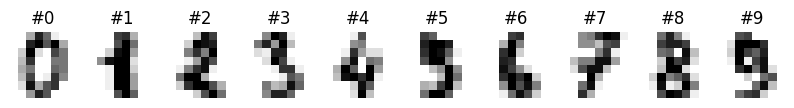

In [3]:
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits_data.images, digits_data.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("#%i" % label)

Uma projeção PCA(Principal Components Analysis) nos dois principais eixos

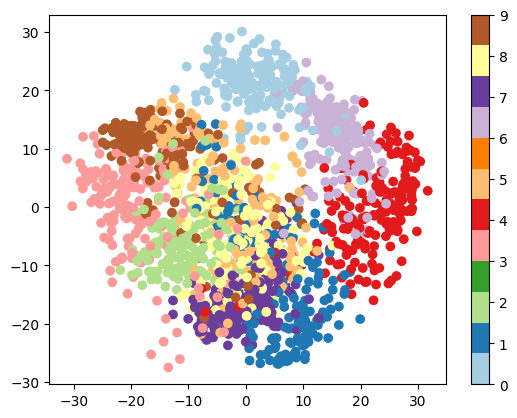

In [4]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits_data.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits_data.target, cmap="Paired")
plt.colorbar()

## 2)   Classificação
Para aplicar um classificador a esses dados, precisamos achatar as imagens, transformando cada matriz 2-D de valores em escala de cinza da forma (8, 8) na forma (64,). Posteriormente, todo o conjunto de dados será de forma (n_samples, n_features), onde n_samples é o número de imagens e n_features é o número total de pixels em cada imagem.

Podemos então dividir os dados em subconjuntos de treinamento e teste e ajustar um classificador de vetor de suporte nas amostras de treinamento. O classificador ajustado pode subsequentemente ser usado para prever o valor do dígito para as amostras no subconjunto de teste.

### 2.1) Máquina de Vetores de Suporte (*Support Vector Machines* - SVM)

In [5]:
from qiskit.utils import algorithm_globals

seed = 123456789
algorithm_globals.random_seed = seed

# achatar as imagens
n_samples = len(digits_data.images)#len(images)#
data = digits_data.images.reshape((n_samples, -1))#images.reshape((n_samples, -1))#

# Classificador: Vetor de Suporte
clf = svm.SVC(gamma=0.001)

# Divisão dos dados: 30% para treino e 70% para testes
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.7, train_size=300, shuffle=True, random_state=algorithm_globals.random_seed
)

t0 = time()
# Treinamento
clf.fit(X_train, y_train)
print("Tempo de execução do treinamento: %0.3fs" % (time() - t0))

t0 = time()
# Previsão dos valores dos dígitos a partir de um sub-conjunto de testes
predicted = clf.predict(X_test)
print("Tempo de execução das previsões: %0.3fs" % (time() - t0))

Tempo de execução do treinamento: 0.011s
Tempo de execução das previsões: 0.026s


Visualização das Previsões

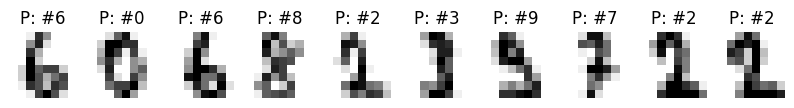

In [6]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"P: #{prediction}")

Relatório de Classificação

In [7]:
print(
    f"Relatório de Classificação {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Relatório de Classificação SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       136
           1       0.92      1.00      0.96       119
           2       0.99      0.98      0.98       130
           3       1.00      0.87      0.93       126
           4       0.98      0.97      0.98       129
           5       0.98      0.96      0.97       128
           6       0.99      0.99      0.99       119
           7       0.96      0.99      0.97       117
           8       0.90      0.91      0.91       127
           9       0.91      0.97      0.94       127

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258




Matriz de Confusão da SVM

SVM: Matriz de Confusão:
[[135   0   0   0   1   0   0   0   0   0]
 [  0 119   0   0   0   0   0   0   0   0]
 [  0   0 127   0   0   0   0   1   2   0]
 [  0   0   1 110   0   1   0   3  10   1]
 [  0   0   0   0 125   0   0   1   0   3]
 [  0   0   0   0   1 123   1   0   0   3]
 [  0   1   0   0   0   0 118   0   0   0]
 [  0   0   0   0   0   0   0 116   0   1]
 [  0   7   0   0   0   0   0   0 116   4]
 [  0   2   0   0   0   1   0   0   1 123]]


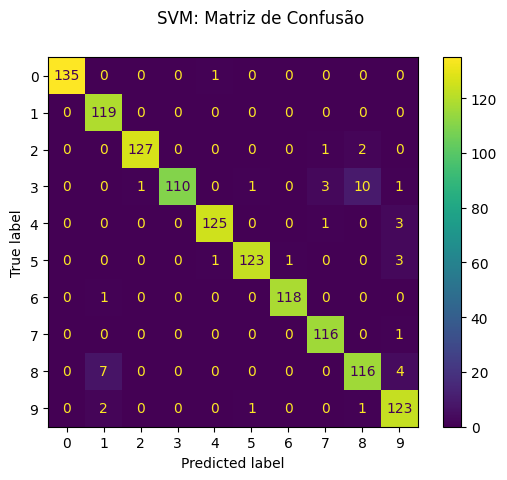

In [8]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("SVM: Matriz de Confusão")
print(f"SVM: Matriz de Confusão:\n{disp.confusion_matrix}")

plt.show()

In [9]:
train_score_c4 = clf.score(X_train, y_train)
test_score_c4 = clf.score(X_test, y_test)

print(f"SVM no conjunto de treino: {train_score_c4:.2f}")
print(f"SVM no conjunto de testes: {test_score_c4:.2f}")

SVM no conjunto de treino: 1.00
SVM no conjunto de testes: 0.96


### 2.2) Máquina de Vetores de Suporte Quântica (*Quantum Support Vector Machine* - QSVM)

Redimensionamento do conjunto de dados usando Análise de Componentes Principais (*Principal Component Analysis* - PCA)

In [10]:
pca = PCA(n_components=2, svd_solver="randomized").fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Definição do Kernel Quântico¶

A instância de kernel quântico quantum kernel auxiliará na classificação dos dados.

Utiliza-se a classe FidelityQuantumKernel que recebe dois parâmetros:

    feature_map: uma instância ZZFeatureMap com um número arbitrário de qubits.

    fidelity: a sub-rotina ComputeUncompute fidelity  que nivela a primitiva Sampler.


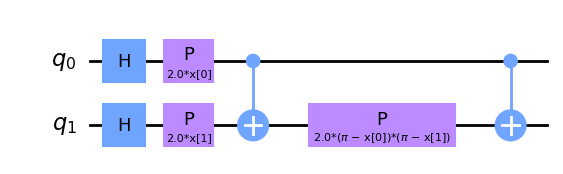

In [22]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

train_features, train_labels, test_features, test_labels = X_train_pca, y_train, X_test_pca, y_test

digits_feature_map = ZZFeatureMap(feature_dimension=2, reps=1, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

digits_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=digits_feature_map)

digits_feature_map.decompose().draw(output="mpl", fold=20)

In [23]:
from time import time

from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=digits_kernel)

t0 = time()
qsvc.fit(train_features, train_labels)
print("Tempo de execução do treinamento: %0.3fs" % (time() - t0))

Tempo de execução do treinamento: 94.545s


Testes de previsão com QSVM

In [24]:
t0 = time()
# Previsão dos valores dos dígitos a partir de um sub-conjunto de testes
predicted = qsvc.predict(test_features[0:299][:])
print("Tempo de execução das previsões: %0.3fs" % (time() - t0))

Tempo de execução das previsões: 192.014s


Relatório de Classificação

In [25]:
print(
    f"Relatório de Classificação {qsvc}:\n"
    f"{metrics.classification_report(test_labels[0:299], predicted)}\n"
)

Relatório de Classificação QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7fcd5d6c37f0>,
     random_state=123456789, shrinking=True, tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00        29
           2       0.07      0.11      0.09        27
           3       0.08      0.12      0.09        33
           4       0.00      0.00      0.00        30
           5       0.08      0.03      0.04        32
           6       0.15      0.21      0.17        28
           7       0.13      0.35      0.19        26
           8       0.04      0.03      0.03        34
           9       0.08      0.13      0.10        23

    a

Matriz de Confusão da QSVM

QVSM: Matriz de Confusão:
[[ 0  0  3  9  2  1  4  9  5  4]
 [ 0  0  2  8  1  4  2  4  2  6]
 [ 0  0  3 10  1  1  2  5  1  4]
 [ 1  1  5  4  5  2  6  4  1  4]
 [ 0  0  7  2  0  0  5 10  4  2]
 [ 0  0  5  5  0  1  5  7  6  3]
 [ 0  0  1  2  3  2  6  6  2  6]
 [ 0  0  7  2  0  0  4  9  2  2]
 [ 0  0  6  9  1  1  4  7  1  5]
 [ 0  0  4  1  4  1  3  6  1  3]]


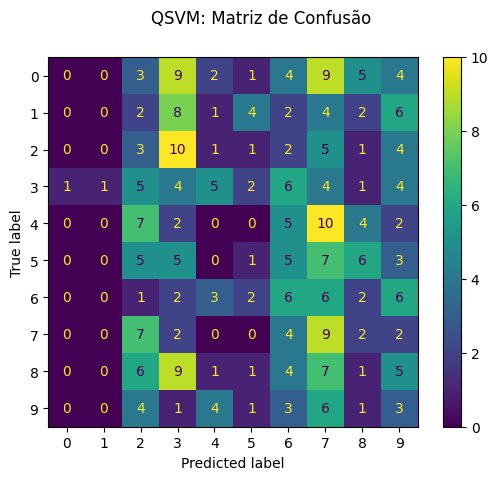

In [26]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(test_labels[0:299], predicted)
disp.figure_.suptitle("QSVM: Matriz de Confusão")
print(f"QVSM: Matriz de Confusão:\n{disp.confusion_matrix}")

plt.show()

In [27]:
import qiskit.tools.jupyter

%qiskit_version_table